In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### 잔차 정규성

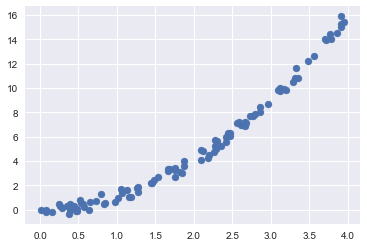

In [2]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise  * np.random.randn(n_sample)
    y = x**2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [3]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2  = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

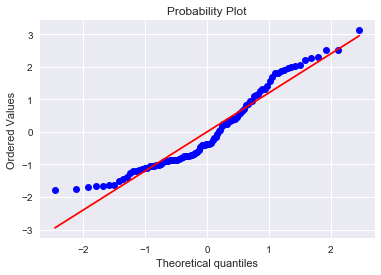

In [4]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [5]:
# 잔차 정규성 검증 - Chi^2으로 정규성 검정 하기
test = sms.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


##### 잔차와 독립 변수의 관계

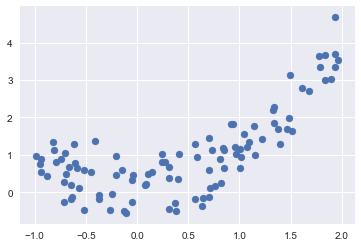

In [6]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise  * np.random.randn(n_sample)
    y = x**2 + bias + epsilon
    return x, y

x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [7]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

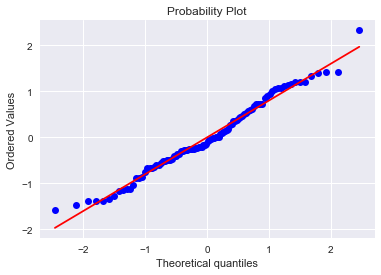

In [8]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [9]:
test = sms.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


In [10]:
# 데이터는 모형 가정을 따르지 않더라고 잔차는 모형 가정 (정규분포) 를 따를 수 있음.
# 다만, 잔차와 독립변수간에 어떤 비선형 상관관계가 있으면 안됨. (?)

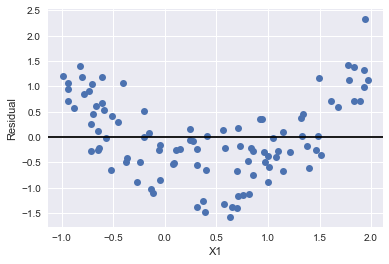

In [11]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel('X1')
plt.ylabel('Residual')
plt.show()

##### Partial Regression plot

In [12]:
# statsmodel : plot_regress_exog명령, sm.graphics.plot_partgress_grid명령

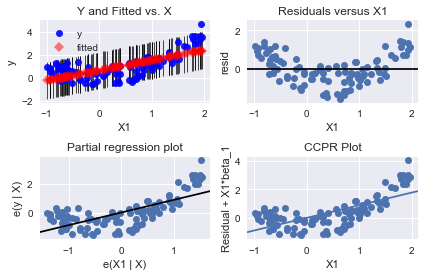

In [13]:
fig = sm.graphics.plot_regress_exog(result3, "X1")
fig.suptitle("")
plt.show()

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX  = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

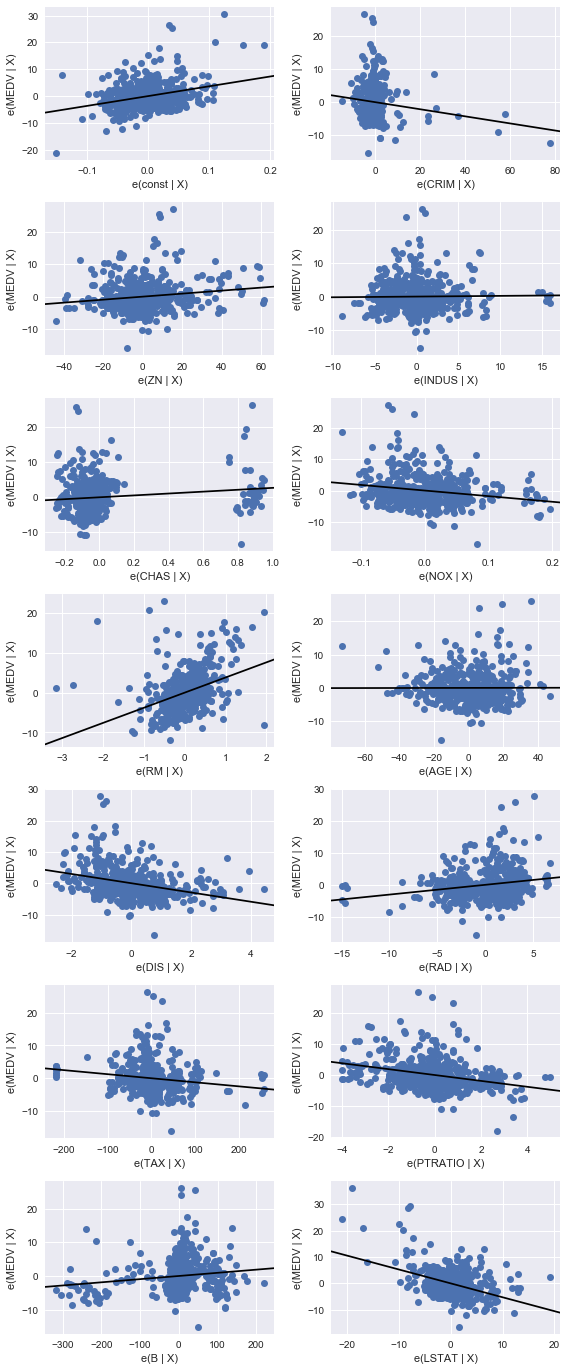

In [15]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston,fig=fig)
fig.suptitle("")
plt.show()

##### CCPR플롯

In [16]:
# 특정 변수와 그 변수에 적용된 가중치 & 오차의 식 plotting

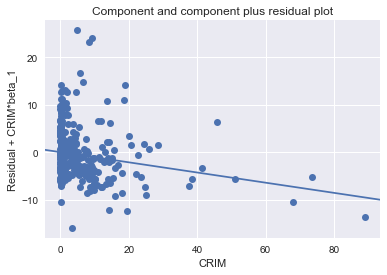

In [17]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

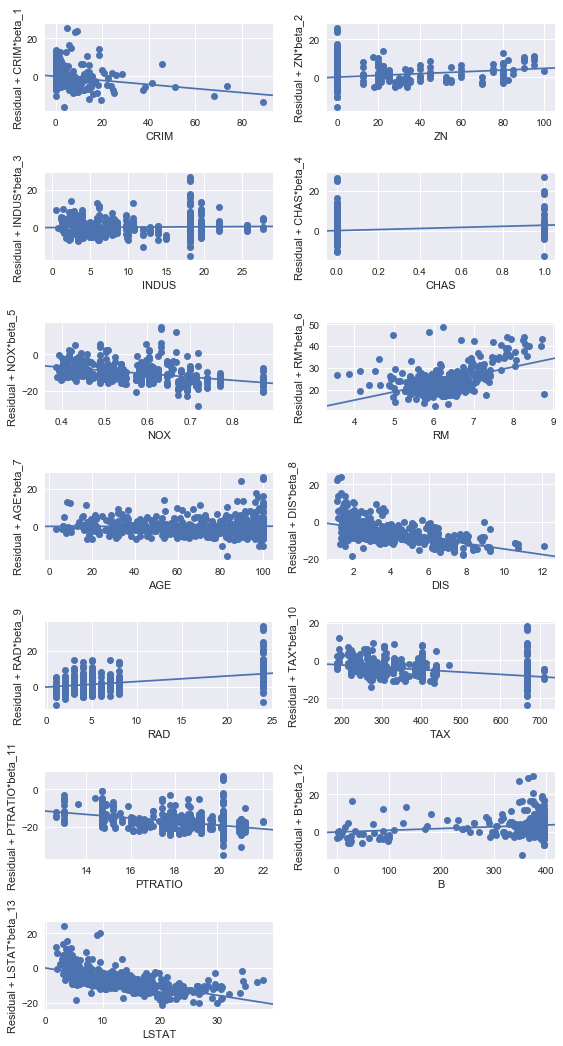

In [18]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

##### 이분산성

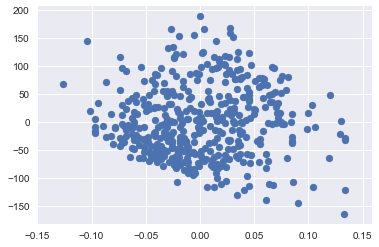

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
               pd.DataFrame(diabetes.target, columns=["target"])],
              axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show()